In [12]:
from __future__ import print_function

import pandas as pd
import scipy as sp

from abtools.bayesian import ConversionModel

%matplotlib inline

# Generate artificial data

In [2]:
p = .03
size = 10000
delta_true = .05

y1 = pd.Series(sp.stats.bernoulli.rvs(p=p, size=size, random_state=8228))
y2 = pd.Series(sp.stats.bernoulli.rvs(p=p*(1+delta_true), size=size, random_state=8228))

print('Mean: %.4f, std: %.2f' % (y1.mean(), y1.std()))
print('Mean: %.4f, std: %.2f' % (y2.mean(), y2.std()))
print('y2 больше y1 на %.4f = %d%%' % (y2.mean()- y1.mean(), (y2.mean()/y1.mean()-1)*100))

Mean: 0.0303, std: 0.17
Mean: 0.0320, std: 0.18
y2 больше y1 на 0.0017 = 5%


# Model fitting

In [91]:
model = ConversionModel(y1, y2)

model.fit(n_init=20000, samples=20000, init='MAP')

/usr/local/lib/python3.5/dist-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


Optimization terminated successfully.
         Current function value: 2770.387348

100%|██████████| 20000/20000 [00:06<00:00, 3303.84it/s]


         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10


# Show results

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdb295c978>], dtype=object)

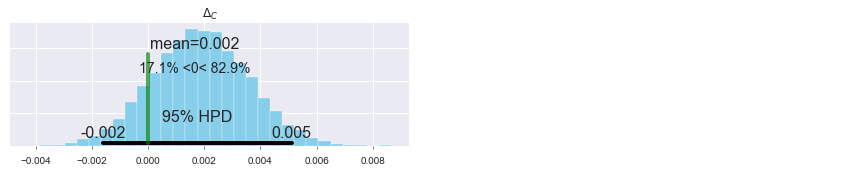

In [84]:
model.plot_deltas()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdba8bcc18>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fcdb22a67f0>], dtype=object)

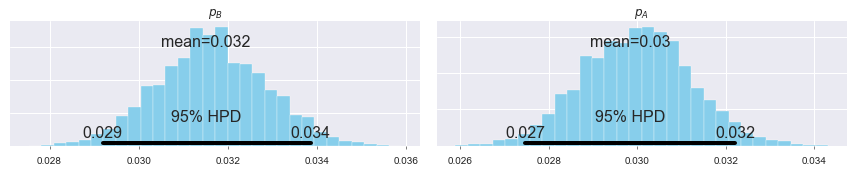

In [85]:
model.plot_params()